Enter File Name: 04-02-19.csv
Enter bus Number: 519
Enter source: THIRUPORUR
Enter destination: T.NAGAR
				Boarding Time				
Enter Start time: 09:00:00
Enter End time: 10:00:00
[20 26 26 26 26 26 29 31 26 30 38 42 42 41 46 51 51 45 50 28 28 28 25  0]


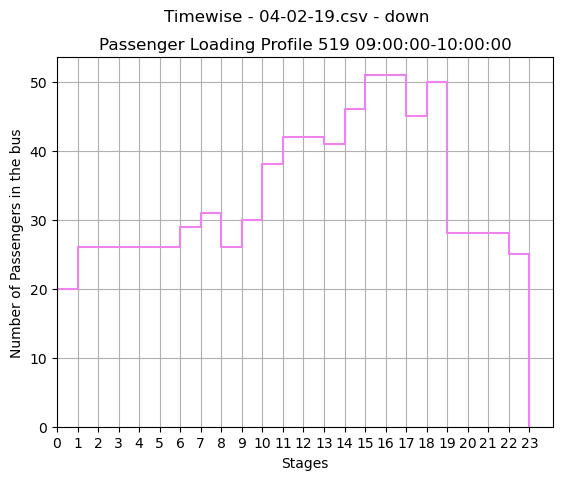

In [4]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt 

#input for any file name
file_name=input("Enter File Name: ")
journey="down"
file_path=os.path.join('week_data',journey, file_name)

if not os.path.isfile(file_path):
    print(f"Error: File '{file_name}' does not exist.")
else:
    df=pd.read_csv(file_path)

#Only 519 buses
bus_no = int(input("Enter bus Number: "))
df = df[df['Schedule Name'].str.contains(rf'\b{bus_no}\b')]

cols=['Schedule Name','Adult','From Stage','To Stage','Trip Start Time','Trip End Time','Source','Destination']
df=df[cols]

source_stage=input("Enter source: ")
destination_stage=input("Enter destination: ")
df=df[(df['Source']==source_stage) & (df['Destination']==destination_stage)]

# Convert the trip start time and end time columns to datetime objects
df['Trip Start Time'] = pd.to_datetime(df['Trip Start Time'], format='%H:%M:%S')
df['Trip End Time'] = pd.to_datetime(df['Trip End Time'], format='%H:%M:%S')

print("\t\t\t\tBoarding Time\t\t\t\t")
# values of start time and end time 
start=input("Enter Start time: ")
end=input("Enter End time: ")
start_time = pd.to_datetime(start).time()
end_time = pd.to_datetime(end).time()

df = df[(df['Trip Start Time'].dt.time >= start_time) & (df['Trip Start Time'].dt.time < end_time)]

bus_stages = [
    'THIRUPORUR', 'KALAVAKKAM', 'CHENGAMMAL', 'ENGG', 'KOMAN NAGAR',
    'KELAMBAKKAM', 'HINDUSTAN', 'PAL. CHEMI', 'CHURCH', 'SIPCOT',
    'NAVALUR', 'CHEMMANCHE', 'KUMARAN NG', 'SHOLINGANALLUR',
    'KARAPAKKAM', 'M K CHAVADI', 'THORAIPAKKAM', 'KANDANCHAV', 
    'SRP TOOLS', 'WPTC', 'ANNA UNIV', 'CONCORDE', 'SAIDAPET', 'T.NAGAR'

]

#assigning numbers from 0 to length of bus stages
stage_mapping = {stage: i for i, stage in enumerate(bus_stages)}

df['From Stage'] = df['From Stage'].map(stage_mapping)
df['To Stage'] = df['To Stage'].map(stage_mapping)
df.dropna(subset=['From Stage', 'To Stage'], inplace=True)

# Create an empty OD matrix with stage names as indexes and columns
od_matrix = pd.DataFrame(index=bus_stages, columns=bus_stages).fillna(0)

# Populate the matrix 
for index, row in df.iterrows():
    source = bus_stages[int(row['From Stage'])]
    destination = bus_stages[int(row['To Stage'])]
    adult_count = row['Adult']
    if not pd.isna(adult_count):
        od_matrix.loc[source, destination] += adult_count
    else:
        pass


od_matrix['Boarding'] = od_matrix.sum(axis=1)

od_matrix['Alighting'] = od_matrix.sum(axis=0)
od_matrix['Sum']=od_matrix['Boarding']-od_matrix['Alighting']

arr=od_matrix['Sum'].values
passengers= np.cumsum(arr)
print(passengers)

stages = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22,23]

plt.step(stages, passengers, where='post',color='violet')
plt.suptitle(f"Timewise - {file_name} - {journey}")
plt.title(f"Passenger Loading Profile {bus_no} {start}-{end}")
plt.xlabel('Stages')
plt.ylabel('Number of Passengers in the bus')
plt.xticks(stages)
plt.grid(True)

# x-axis and y-axis intersect at the origin
plt.xlim(left=0)  
plt.ylim(bottom=0)  

plt.show()

